### Selenium
- 브라우저를 실행해서 자동화하고 브라우저 상에 있는 데이터를 수집
- 웹 테스트 자동화를 위해 만들어진 라이브러리
- 다양한 브라우저 지원
- 다양한 언어 지원

In [1]:
driver = webdriver.Chrome()

In [2]:
# 페이지 이동
driver.get('https://daum.net')

In [3]:
# 윈도우 사이즈 조절
# 보여지는 영역에서만 적용가능
driver.set_window_size(800, 600)

In [4]:
# 스크롤 위치조절
driver.execute_script('window.scrollTo(200, 300);')

In [5]:
# alert 다루기
driver.execute_script("alert('FastCampus!');")

In [6]:
# alert 확인버튼 누르기
alert = driver.switch_to.alert
alert.accept()

In [7]:
# 검색창에 검색어 입력
driver.find_element_by_css_selector('#q').send_keys('패스트캠퍼스')

In [8]:
# 검색창 지우기
driver.find_element_by_css_selector('#q').clear()

In [9]:
# 검색어 입력
driver.find_element_by_css_selector('#q').send_keys('파이썬')

In [10]:
# 검색 버튼 클릭
driver.find_element_by_css_selector('.btn_search').click()

In [11]:
# 창 닫기(반드시 해야함)
driver.quit()

#### Darksky api 키 재발급 자동화
- https://darksky.net/dev

In [12]:
# 브라우저 열기
driver = webdriver.Chrome()

In [13]:
# 페이지 이동
driver.get('https://darksky.net/dev/login')

In [14]:
# 로그인 정보 입력
email = 'email'
pw = 'password'
driver.find_element_by_css_selector('#email').send_keys(email)
driver.find_element_by_css_selector('#password').send_keys(pw)

In [15]:
# 로그인 버튼 클릭
driver.find_element_by_css_selector('[type="submit"]').click()

In [16]:
# 'RESET SECRET KEY' 버튼 클릭
driver.find_element_by_css_selector('.reset-key').click()

In [17]:
# 알림창 확인 버튼 클릭
alert = driver.switch_to.alert
alert.accept()

In [18]:
# secret key 가져오기
s_key = driver.find_element_by_css_selector('#api-key').get_attribute('value')
# s_key

In [19]:
# 드라이버 닫기
driver.quit()

In [20]:
# 함수로 만들기
def reset_darksky_key(ID, PW):
    driver = webdriver.Chrome()
    driver.get('https://darksky.net/dev/login')
    driver.find_element_by_css_selector('#email').send_keys(ID)
    driver.find_element_by_css_selector('#password').send_keys(PW)
    driver.find_element_by_css_selector('[type="submit"]').click()
    driver.find_element_by_css_selector('.reset-key').click()
    alert = driver.switch_to.alert
    alert.accept()
    s_key = driver.find_element_by_css_selector('#api-key').get_attribute('value')
    driver.quit()
    return s_key

In [21]:
# reset_darksky_key(email, pw)

#### 네이버 기사 제목 데이터 크롤링
- thread 이용(비동기방식)

In [22]:
page = 2
url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=105#&date= 00:00:00&page={page}'

In [23]:
driver = webdriver.Chrome()
driver.get(url)

In [24]:
articles = driver.find_elements_by_css_selector('.section_body li')
len(articles)

20

In [25]:
articles[0].find_element_by_css_selector('dt:nth-child(2)').text

'국회에 막혀… 타다 혁신은 여기까지'

In [26]:
articles[0].find_element_by_css_selector('dt:not(.photo)').text

'국회에 막혀… 타다 혁신은 여기까지'

In [27]:
article_list = []
for article in articles:
    title = article.find_element_by_css_selector('dt:nth-child(2)').text
    article_list.append(title)

In [28]:
article_list

['국회에 막혀… 타다 혁신은 여기까지',
 '유예기간 1년6개월 남았는데…법사위 통과하자 "서비스 중단"',
 '울분 터트린 이재웅 "정부·국회는 죽었다"…타다 "사업 접겠다"',
 "총선 한달 앞둔 국회 법사위 '타다 금지'…타다 '날벼락'",
 '인터넷은행 걸림돌 제거, 암호화폐 제도권으로..KT와 업비트 ‘환영’',
 '타다는 반대 고수했지만…여객법 개정안 법사위 통과',
 '법사위 통과에 타다 "베이직 중단" 초강수… 이재웅 "정부·국회는 죽었다"(종합)',
 'KT 대주주 족쇄 풀렸다..인뱅法, 법사위 통과',
 '가상화폐, 제도권 편입 눈 앞…특금법 국회 법사위 통과',
 "인터넷은행 개정안 통과...'케이뱅크' 9부능선 넘었다",
 '\'여객운수법\' 법사위 통과…모빌리티 업계 "불확실성 해소" 환영',
 '특금법, 국회 법사위 통과…‘암호화폐 업계 구조조정 본격화’',
 '무죄판결 2주만에 멈추는 \'타다\'..이재웅 "국민의 선택권 빼앗겼다"',
 '타다 시동 끈다',
 '‘타다’ 카니발 멈춘다… 이재웅 “참담하다”',
 '중국 최대 사이버보안 기업 "CIA, 11년간 중국 기업·기관 해킹"',
 '박홍근 의원 "여객운수법, 타다 금지 아냐…형평성 맞추자는 것"',
 '‘타다금지법’ 통과..이재웅 "혁신도 국회도 죽었다"',
 '[종합] 타다금지법, 진통 끝 법사위 통과…국회 본회의 남아',
 '타다의 초강수, 본회의 통과 시 베이직 서비스 중단']

In [29]:
driver.quit()

In [30]:
# 함수로 만들기
article_list = []

def get_articles(page):
    url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=105#&date= 00:00:00&page={page}'
    driver = webdriver.Chrome()
    driver.get(url)
    articles = driver.find_elements_by_css_selector('.section_body li')
    for article in articles:
        title = article.find_element_by_css_selector('dt:nth-child(2)').text
        article_list.append(title)
    print(f'crawling : {page}')
    driver.quit()

In [40]:
%%time
for page in range(1, 5):
    get_articles(page)

crawling : 1
crawling : 2
crawling : 3
crawling : 4
Wall time: 40.8 s


In [42]:
len(article_list)

80

- thread 사용

In [43]:
import threading

In [48]:
article_list = []

for page in range(1, 5):
    th = threading.Thread(target=get_articles, args=(page,))
    th.start()

In [49]:
sec = 0
while len(article_list) < 80 :
    time.sleep(1)
    sec += 1
    print(sec, end=' ')

1 2 3 4 5 6 7 8 9 10 crawling : 1
crawling : 2
crawling : 3
crawling : 4
11 

### 이미지 크롤링
- 유튜브 영상 이미지 크롤링
- 특정 영역(element) 자르기
    - pillow : python 이미지 전처리 패키지
- 유튜브 영상 데이터 다운로드
- headless 설정
    - 브라우저를 화면에 띄우지 않고 RAM영역에만 띄워 하는 방법
    - 서버에서 selenium을 이용해서 크롤링 할 때 사용

In [50]:
from PIL import Image as pil

In [ ]:
# 이미지 스크린샷

In [51]:
!mkdir image

In [52]:
url = 'https://www.youtube.com/watch?v=jKSFuP-gVbk&t=8s'
driver = webdriver.Chrome()
driver.get(url)

In [54]:
driver.save_screenshot('image/screenshot.png')
driver.quit()

In [55]:
!ls image

screenshot.png


(929, 928)


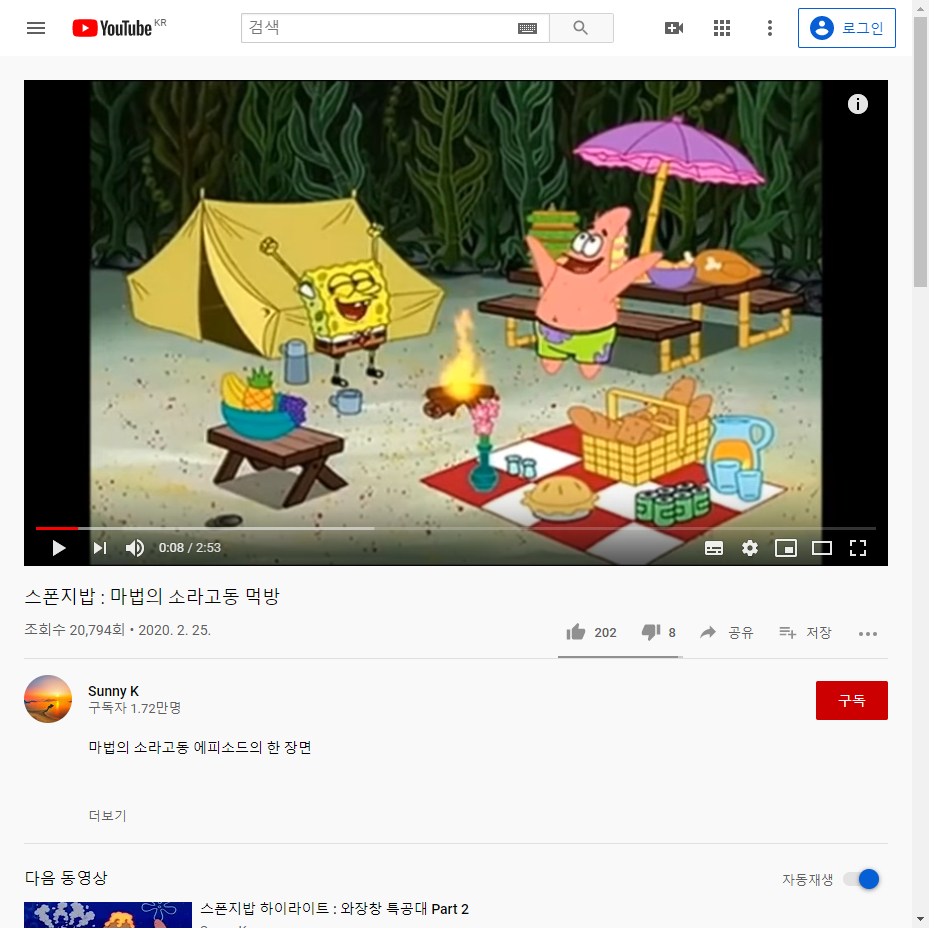

In [56]:
pil_img = pil.open('image/screenshot.png')
print(pil_img.size)
pil_img

In [ ]:
# 특정 영역의 엘리먼트 좌표값 구하기

In [58]:
driver = webdriver.Chrome()
driver.get(url)

In [59]:
element = driver.find_element_by_css_selector('#movie_player')
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 486, 'width': 864}


In [60]:
# 해상도에 따라서 이미지 크기가 달라질 수 있는데 area의 각 요소에 가중치를 줘서 비율 조정하면 됨
left = location['x']
top = location['y']
right = left + size['width']
bottom = top + size['height']
area = (left, top, right, bottom)
area

(24, 80, 888, 566)

In [ ]:
# 이미지를 pillow로 잘라주기

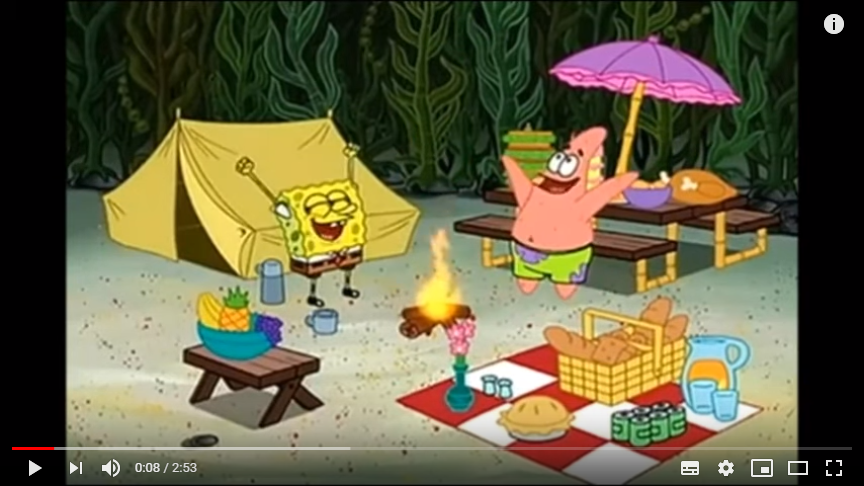

In [61]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [ ]:
# 이미지 저장

In [62]:
pil_element_img.save('image/screenshot_element.png')

In [63]:
!ls image

screenshot.png
screenshot_element.png


In [ ]:
# 썸네일 만들기
# 원본 이미지를 다양한 사이즈로 축소하는 방법

In [64]:
pil_element_img.size

(864, 486)

(320, 180)


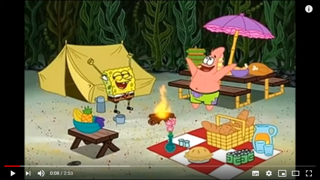

In [65]:
pil_element_img.thumbnail((320, 180))
print(pil_element_img.size)
pil_element_img

#### Headless

In [68]:
options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome(options=options)
driver.get('https://fastcampus.co.kr/')
print(driver.title)
driver.quit()

패스트캠퍼스 - 커리어 성장을 위한 최고의 실무교육 아카데미


#### 영상파일 다운로드
- `www.` -> `ss`

In [69]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = f'image/{title}', 0
    with open(save_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [70]:
url = 'https://www.youtube.com/watch?v=jKSFuP-gVbk'

In [71]:
# 다운로드 버튼 링크
link = 'https://r6---sn-ab5l6nsr.googlevideo.com/videoplayback?expire=1583347157&ei=daFfXr-yHvCjhwaC5IXQCQ&ip=2604%3A180%3Af3%3A%3A68&id=o-AG_PrUy6vHpLwuUqhly-8AVF0JymU5XlwcksptkaPfW0&itag=22&source=youtube&requiressl=yes&mm=31%2C29&mn=sn-ab5l6nsr%2Csn-ab5szne7&ms=au%2Crdu&mv=m&mvi=5&pl=48&initcwndbps=632500&vprv=1&mime=video%2Fmp4&ratebypass=yes&dur=173.824&lmt=1583038208786063&mt=1583325458&fvip=6&fexp=23842630&c=WEB&txp=5316222&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cratebypass%2Cdur%2Clmt&sig=ADKhkGMwRQIhAPI7B5w8ChTt38aRrGr7cMWXvi-6yPoP3Q-T1mTkgcV_AiAtB5W7buJV-Xyrr8Xk_fzYuaD5JW3WuTO-D4pM-5txnw%3D%3D&lsparams=mm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=ABSNjpQwRQIgZU7KG619e34EWorsmvEzZtjH7_EWuJumJMhzadQqe8ACIQCwoTUuWJLqNETQ7IIkERnTwxd81Jdx_jSr7ad_QyOV_w%3D%3D&contentlength=29554174&video_id=jKSFuP-gVbk&title=%EC%8A%A4%ED%8F%B0%EC%A7%80%EB%B0%A5+-+%EB%A7%88%EB%B2%95%EC%9D%98+%EC%86%8C%EB%9D%BC%EA%B3%A0%EB%8F%99+%EB%A8%B9%EB%B0%A9'

In [73]:
title = '마법의 소라고동 먹방.mp4'
size = download(title, link)
print(f'{round(size/1024/1024)} Mb')

28 Mb
